# Simple Linear Regression Project: TV Ads vs Sales

# import libraries

In [56]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# load dataset

In [57]:
# load dataset directly from github
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url)

#display first five rows
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### There is no null value present in the dataset

# Select features (X and y)

In [59]:
# For simple linear regression, we select only TV and sales

X = df[['TV']] # independent variable
y = df['sales'] # dependent variable

print(X.head())
print(y.head())

      TV
0  230.1
1   44.5
2   17.2
3  151.5
4  180.8
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64


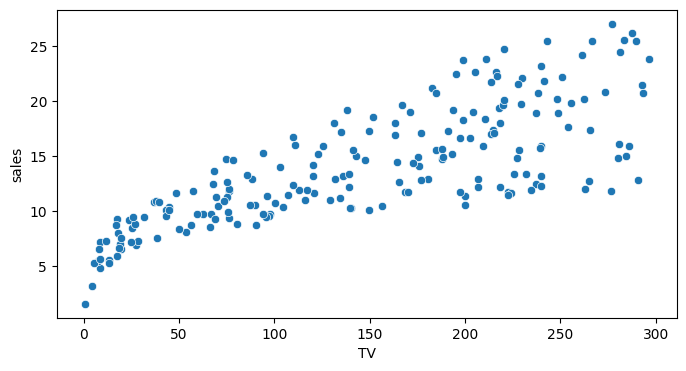

In [60]:
# check the relationship between sales and TV
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x = df['TV'], y=df['sales'])

#save figure
plt.savefig('../results/tv_sales_rel.png', dpi=300, bbox_inches='tight')

plt.show()


### we can see that there is a linear relationship between TV and sales

# Split Train/Test

In [61]:
# split the data into training and testing set, split 20% data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train Size: ", X_train.shape)
print("Test Size: ", X_test.shape)

Train Size:  (160, 1)
Test Size:  (40, 1)


# Train Model

In [62]:
# Train Model

model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully")

Model trained successfully


In [63]:
# get model parameters

m = model.coef_[0]
c = model.intercept_

print(f'Equation of line: sales = {m:.2f}*TV + {c:.2f}')

Equation of line: sales = 0.05*TV + 7.12


# prediction on test data

In [68]:
# prediction on test data

y_pred = model.predict(X_test)

# compare first 10 actual vs predicted
comparison = pd.DataFrame({'Actual Sales':y_test.values, 'Predicted Sales': y_pred})
comparison.head(10)


,Actual Sales,Predicted Sales
0,16.9,14.717944
1,22.4,16.211548
2,21.4,20.748197
3,7.3,7.664036
4,24.7,17.370139
5,12.6,10.614021
6,22.3,17.207285
7,8.4,9.446125
8,11.5,17.467851
9,14.9,15.266995


/var/folders/ng/m4yd93hn3dd0fttqhm_f8prc0000gn/T/ipykernel_4577/3896179582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_table['Predicted Sales'] = comparison_table['Predicted Sales'].round(2)


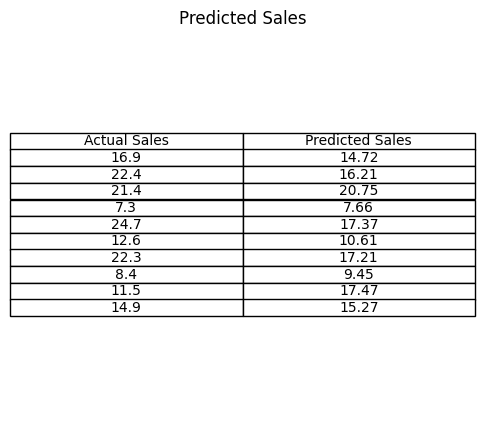

In [71]:
# save the predicted dataframe as image

comparison_table = comparison.head(10)
comparison_table['Predicted Sales'] = comparison_table['Predicted Sales'].round(2)
#create figure
fig, ax = plt.subplots(figsize=(6,5))
ax.axis('tight')
ax.axis('off')

#create table
table = ax.table(cellText=comparison_table.values, colLabels = comparison_table.columns, cellLoc='center', loc='center')

# save fig
plt.savefig('../results/predicted_sales.png', dpi=300, bbox_inches='tight')
plt.title('Predicted Sales')
plt.show()


# Evaluate model

In [66]:
# Evaluate model
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Absolute Error: 2.444420003751042
R2 Score: 0.6766954295627076


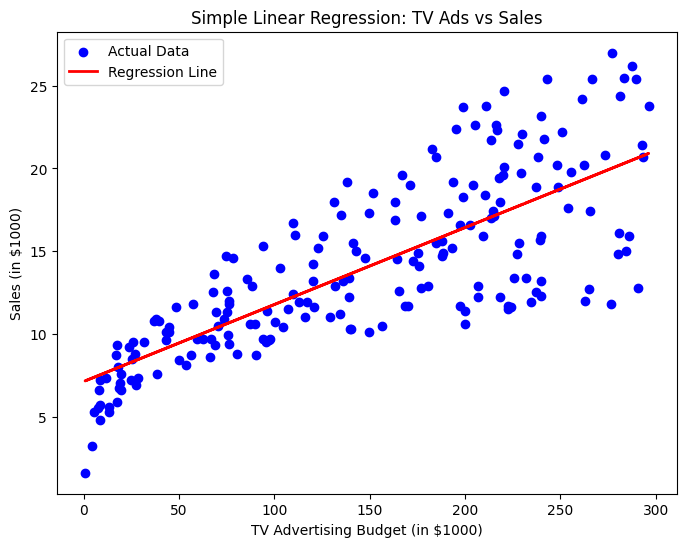

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, model.predict(X), color="red", linewidth=2, label="Regression Line")
plt.xlabel("TV Advertising Budget (in $1000)")
plt.ylabel("Sales (in $1000)")
plt.title("Simple Linear Regression: TV Ads vs Sales")
plt.legend()
plt.show()


### here we can see that the model is not more accurate, so for getting more better result we have to select other model selection like multiple linear regression